<a href="https://colab.research.google.com/github/ajayjai30/IMAGE-CLASSIFICATION-USING-SKLEARN/blob/main/PROJECT_IMAGE_CLASSIFICATION_USING_SCIKIT_LEARN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np

# **ASSIGNING THE INPUT DIRECTORY**

In [ ]:
input_dir='/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS'

In [ ]:
a=['cats','dogs']

# **LOOKING FOR HOW MANY DIRECTORIES ARE THERE**

In [ ]:
for category in a:
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path = os.path.join(input_dir,category,file)
    print(img_path)

/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.131.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.122.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.106.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.132.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.109.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.105.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.119.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.130.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.128.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.125.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.1.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.123.jpg
/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.113.jpg
/content/drive/MyDrive/dogs

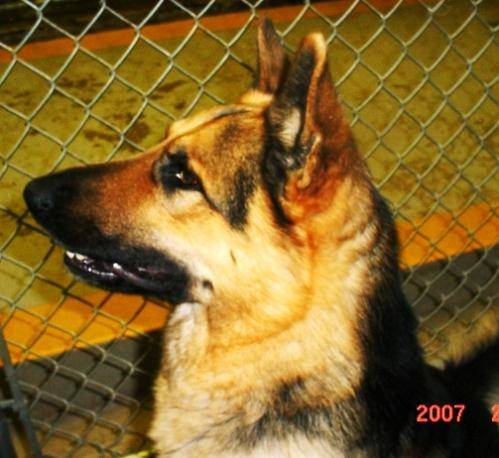

In [ ]:
Image.open("/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/dogs/dog.107.jpg")

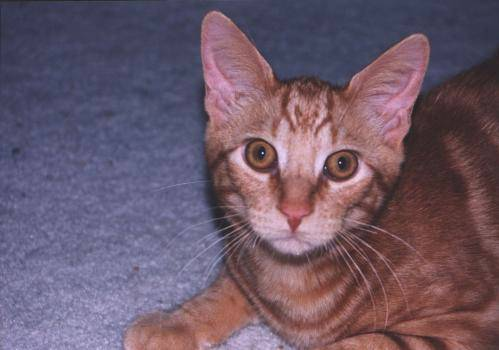

In [ ]:
Image.open("/content/drive/MyDrive/dogs_and_cats_images/DOGS_AND_CATS/cats/cat.107.jpg")

# **CONVERTING AN SINGLE IMAGE INTO AN ARRAY FOR  REERENCE**

In [ ]:
img=imread(img_path)
print(img)

[[[139 161 185]
  [131 151 175]
  [131 149 169]
  ...
  [226 234 213]
  [223 235 213]
  [223 235 213]]

 [[126 146 170]
  [119 140 161]
  [123 140 158]
  ...
  [223 233 209]
  [220 232 208]
  [220 232 208]]

 [[113 131 153]
  [111 128 148]
  [118 131 148]
  ...
  [225 235 210]
  [223 236 208]
  [223 236 208]]

 ...

 [[154 148 152]
  [166 157 162]
  [164 153 159]
  ...
  [222 182 190]
  [223 182 188]
  [223 182 188]]

 [[154 148 152]
  [165 156 161]
  [164 153 159]
  ...
  [224 184 192]
  [225 184 190]
  [225 184 190]]

 [[154 148 152]
  [165 156 161]
  [163 152 158]
  ...
  [225 185 193]
  [226 185 191]
  [226 185 191]]]


In [ ]:
img.shape

(500, 483, 3)

In [ ]:
img=img.flatten()
img

array([139, 161, 185, ..., 226, 185, 191], dtype=uint8)

In [ ]:
data=[]
labels=[]

In [ ]:
for i,j in enumerate(a):
  for file in os.listdir(os.path.join(input_dir,j)):
    img_path = os.path.join(input_dir,j,file)
    img = imread(img_path)
    img = resize(img,(15,15))
    data.append(img.flatten())
    labels.append(i)

In [ ]:
data=np.asarray(data)
labels=np.asarray(labels)

# **IMPORTING LIBRARIES FOR TRAINING WITH THE DATASET**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

**SPLITTING THE DATASET INTO TRAINING AND TESTING SETS**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=1,shuffle=True,stratify=labels)

**STANDARDISING THE TRAINING AND TESTING DATASETS**

In [ ]:
s=StandardScaler()

In [ ]:
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

#**PERFORMING LINEARREGRESSION ON THE DATASET**

In [ ]:
l=LinearRegression()

In [ ]:
l.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lin=l.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_lin)

-0.7757080247059662

**THE R2 SCORE SHOWS THAT LINEARREGRESSION CANNOT ABLE TO FIT ITSELF WITH THE TRAINING AND TESTING DATA**

#**PERFORMING LOGISTICREGRESSION ON THE TRAINING DATA**

In [ ]:
i=LogisticRegression(max_iter=1000000)

In [ ]:
i.fit(x_train,y_train)

LogisticRegression(max_iter=1000000)

In [ ]:
y_pred_log=i.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_log)*100

56.75

**ACCURACY OF THE MODEL IS NOT GOOD TO GO WITH AS IT ONLY GIVES A POOR 56.75% ACCURACY**

#**PERFORMING WITH THE DECISION TREE CLASSIFIER**

In [ ]:
#with gini as a criterion
d_gini=DecisionTreeClassifier(criterion='gini')
#with entropy as a criterion
d_entropy=DecisionTreeClassifier(criterion='entropy')

In [ ]:
d_gini.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
d_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dec_gini=d_gini.predict(x_test)
y_pred_dec_entropy=d_entropy.predict(x_test)

In [ ]:
print('Accuracy for DecisionTreeClassifier using gini as criterion:',accuracy_score(y_test,y_pred_dec_gini)*100,"%")
print('Accuracy for DecisionTreeClassifier using entropy as criterion:',accuracy_score(y_test,y_pred_dec_entropy)*100,"%")

Accuracy for DecisionTreeClassifier using gini as criterion: 55.50000000000001 %
Accuracy for DecisionTreeClassifier using entropy as criterion: 57.99999999999999 %


DECISION TREE WITH GINI AS CRITERION PERFORMS WELL WITH ENTROPY AS CRITERION IN THIS CASE

#**PERFORMING WITH RANDOMFORESTCLASSIFIER**

In [ ]:
r=RandomForestClassifier(n_estimators=10000)

In [ ]:
r.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10000)

In [ ]:
y_pred_ran=r.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_ran)*100

62.25000000000001

**RANDOMFORESTCLASSIFIER GIVES AN ACCURACY OF 62.25%**

#**USING K MEANS CLUSTERING ALGORITHM**


In [ ]:
k=KMeans()

In [ ]:
k.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
y_test_kmeans=k.predict(x_test)

In [ ]:
print('Accuracy of Kmeans:',accuracy_score(y_test_kmeans,y_test)*100)

Accuracy of Kmeans: 15.25


#**RESULTS**

In [ ]:
import pandas as pd
pd.DataFrame({"ACTUAL VALUE": y_test,"PREDICTED VALUE USING LOGISTICREGRESSION":y_pred_log,"PREDICTED VALUE USING DECISION TREE WITH ENTROPY INDEX":y_pred_dec_entropy,"PREDICTED VALUE USING DECISION TREE WITH GINI INDEX":y_pred_dec_gini,"PREDICTED VALUE USING RANDOMFORESTCLASSIFIER":y_pred_ran,"PREDICTED VALUE USING KMEANS CLSUTERING":y_test_kmeans})

,ACTUAL VALUE,PREDICTED VALUE USING LOGISTICREGRESSION,PREDICTED VALUE USING DECISION TREE WITH ENTROPY INDEX,PREDICTED VALUE USING DECISION TREE WITH GINI INDEX,PREDICTED VALUE USING RANDOMFORESTCLASSIFIER,PREDICTED VALUE USING KMEANS CLSUTERING
0,0,0,0,0,0,7
1,0,0,0,1,0,1
2,1,1,1,1,1,1
3,1,0,1,1,0,4
4,0,1,0,0,0,5
...,...,...,...,...,...,...
395,1,0,0,1,0,2
396,0,1,1,0,1,2
397,0,0,0,0,0,6
398,1,0,1,0,0,3


#**OF ALL THE ALGORITHMS TRAINED IT SHOWS THAT RANDOMFORESTCLASSIFIER PERFORMS BETTER THAN ALL OTHER ALGORITHMS**
